# Part 3: Predictive Modeling

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import pathlib

In [2]:
cwd = pathlib.Path.cwd()

In [3]:
df = pd.read_json(cwd/'data/ultimate_data_challenge.json')

In [4]:
df.describe()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver
count,50000.000000,41878.000000,50000.000000,50000.000000,50000.000000,50000.000000,49799.000000
mean,2.278200,4.601559,1.074764,8.849536,60.926084,5.796827,4.778158
std,3.792684,0.617338,0.222336,19.958811,37.081503,5.707357,0.446652
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,4.300000,1.000000,0.000000,33.300000,2.420000,4.700000
50%,1.000000,4.900000,1.000000,0.000000,66.700000,3.880000,5.000000
75%,3.000000,5.000000,1.050000,8.600000,100.000000,6.940000,5.000000
max,125.000000,5.000000,8.000000,100.000000,100.000000,160.960000,5.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    41878 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    49799 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


## Missing Values    
    Three columns are missing some data: 
        - avg_rating_of_driver
        - phone
        - avg_rating_by_driver
        
    The options are to fully remove these values, or to recode them as different values. I will first look at the representation of missing values in each city after which point I will likely remove them.

In [6]:
df[df.avg_rating_of_driver.isna()].groupby('city')['signup_date'].count()/8122

city
Astapor           0.355454
King's Landing    0.157966
Winterfell        0.486580
Name: signup_date, dtype: float64

In [7]:
df[df.phone.isna()].groupby('city')['signup_date'].count()/396

city
Astapor           0.305556
King's Landing    0.161616
Winterfell        0.532828
Name: signup_date, dtype: float64

In [8]:
df[df.avg_rating_by_driver.isna()].groupby('city')['signup_date'].count()/201

city
Astapor           0.288557
King's Landing    0.199005
Winterfell        0.512438
Name: signup_date, dtype: float64

    Across the 3 features missing data, the representation of missing data is primarily concentrated in Winterfell at ~50% of missing values for each feature being from there. 

## Number of users per city:

In [9]:
df_city_pop = df.groupby('city').count().reset_index().sort_values(by='trips_in_first_30_days')
df_device_pops = df.groupby('phone').count().reset_index().sort_values(by='trips_in_first_30_days')
df_ub_stats = df.groupby('ultimate_black_user').count().reset_index().sort_values(by='trips_in_first_30_days')

### Before dropping nulls:

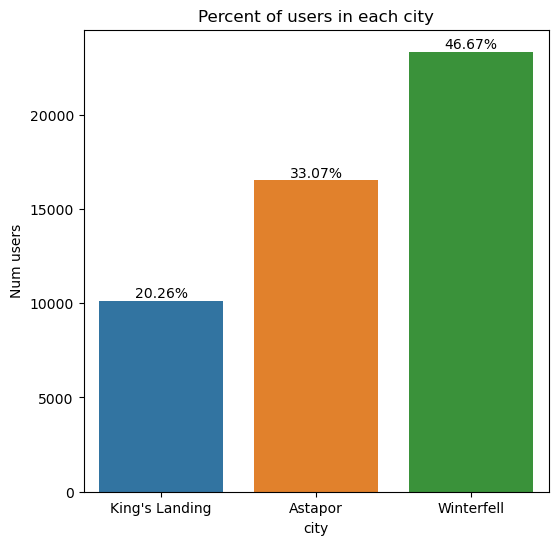

In [10]:
_ , ax = plt.subplots(1,1,figsize=(6,6))

sns.barplot(data=df_city_pop, x='city', y='trips_in_first_30_days', ax=ax)

for rect in ax.patches:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., height +.01,
                f'{height/df_city_pop.trips_in_first_30_days.sum():.2%}',
                ha='center', va='bottom')
ax.set_ylabel('Num users')
ax.set_title('Percent of users in each city')

plt.show()

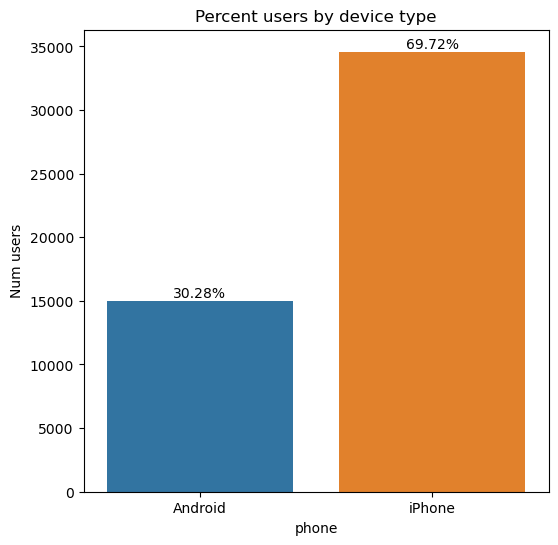

In [11]:
_ , ax = plt.subplots(1,1,figsize=(6,6))

sns.barplot(data=df_device_pops, x='phone', y='trips_in_first_30_days', ax=ax)

for rect in ax.patches:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., height +.01,
                f'{height/df_device_pops.trips_in_first_30_days.sum():.2%}',
                ha='center', va='bottom')
ax.set_ylabel('Num users')
ax.set_title('Percent users by device type')

plt.show()

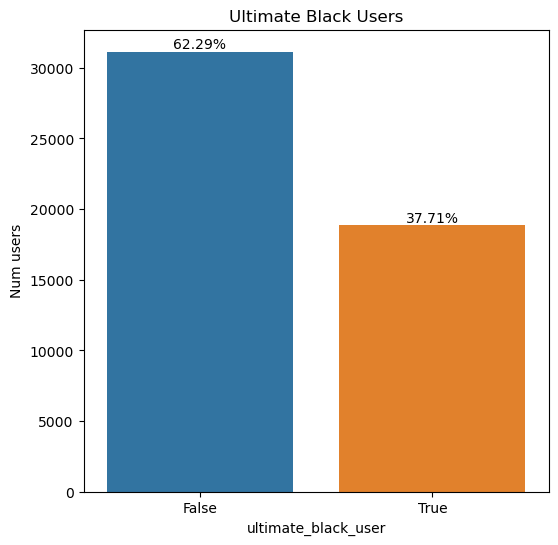

In [12]:
_ , ax = plt.subplots(1,1,figsize=(6,6))

sns.barplot(data=df_ub_stats, x='ultimate_black_user', y='trips_in_first_30_days', ax=ax)

for rect in ax.patches:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., height +.01,
                f'{height/df_ub_stats.trips_in_first_30_days.sum():.2%}',
                ha='center', va='bottom')
ax.set_ylabel('Num users')
ax.set_title('Ultimate Black Users')
plt.show()

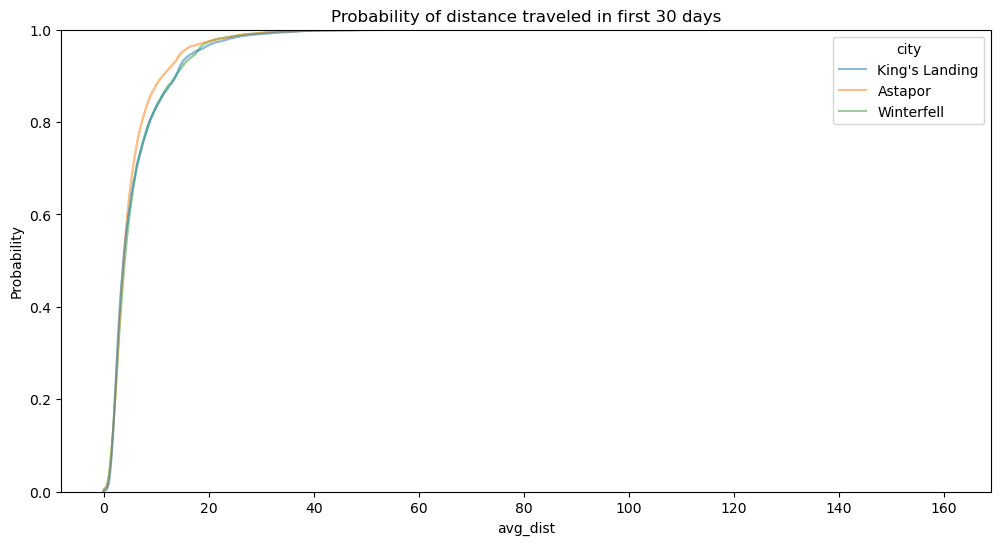

In [13]:
_ , ax = plt.subplots(1,1,figsize=(12,6))

sns.ecdfplot(data=df, x='avg_dist', hue='city',ax=ax,stat='proportion',alpha=0.5)

#for rect in ax.patches:
#        height = rect.get_height()
#        ax.text(rect.get_x() + rect.get_width()/2., height +.01,
#                f'{height/df_device_pops.trips_in_first_30_days.sum():.2%}',
#                ha='center', va='bottom')
ax.set_ylabel('Probability')
ax.set_title('Probability of distance traveled in first 30 days')

plt.show()

Before droppin null values the number of users    

### After Dropping Nulls:

In [14]:
df_city_pop_after = df.dropna().groupby('city').count().reset_index().sort_values(by='trips_in_first_30_days')
df_device_pops_after = df.dropna().groupby('phone').count().reset_index().sort_values(by='trips_in_first_30_days')
df_ub_stats_after = df.dropna().groupby('ultimate_black_user').count().reset_index().sort_values(by='trips_in_first_30_days')

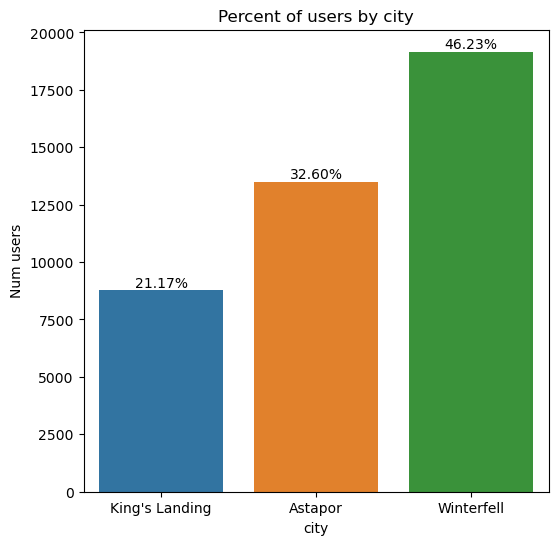

In [15]:
_ , ax = plt.subplots(1,1,figsize=(6,6))

sns.barplot(data=df_city_pop_after, x='city', y='trips_in_first_30_days', ax=ax)

for rect in ax.patches:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., height +.01,
                f'{height/df_city_pop_after.trips_in_first_30_days.sum():.2%}',
                ha='center', va='bottom')
ax.set_ylabel('Num users')
ax.set_title('Percent of users by city')

plt.show()

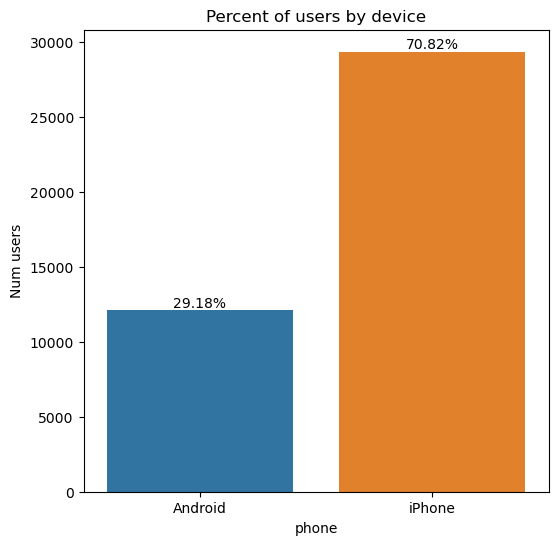

In [16]:
_ , ax = plt.subplots(1,1,figsize=(6,6))

sns.barplot(data=df_device_pops_after, x='phone', y='trips_in_first_30_days', ax=ax)

for rect in ax.patches:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., height +.01,
                f'{height/df_device_pops_after.trips_in_first_30_days.sum():.2%}',
                ha='center', va='bottom')
ax.set_ylabel('Num users')
ax.set_title('Percent of users by device')

plt.show()

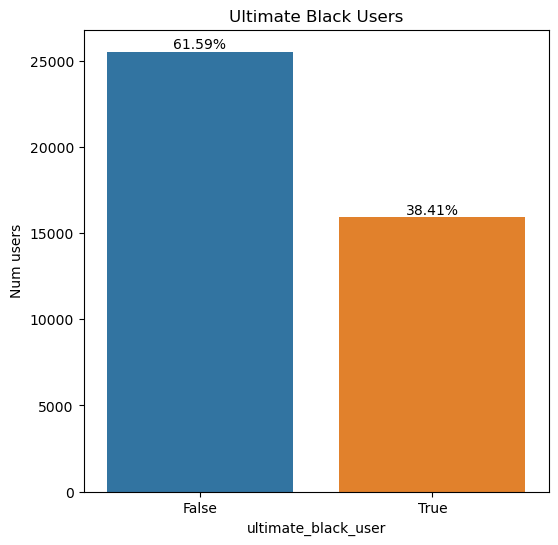

In [17]:
_ , ax = plt.subplots(1,1,figsize=(6,6))

sns.barplot(data=df_ub_stats_after, x='ultimate_black_user', y='trips_in_first_30_days', ax=ax)

for rect in ax.patches:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., height +.01,
                f'{height/df_ub_stats_after.trips_in_first_30_days.sum():.2%}',
                ha='center', va='bottom')
ax.set_ylabel('Num users')
ax.set_title('Ultimate Black Users')

plt.show()

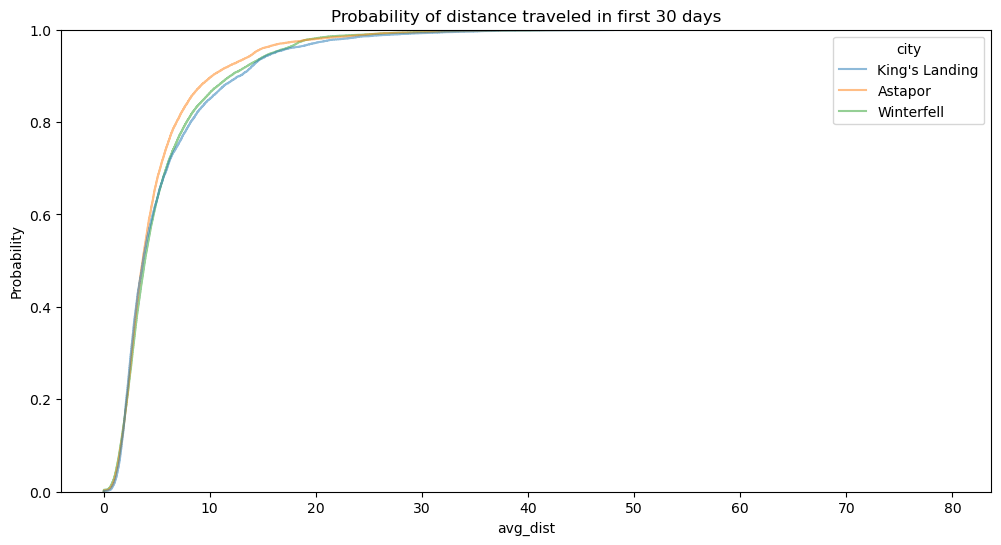

In [18]:
_ , ax = plt.subplots(1,1,figsize=(12,6))

sns.ecdfplot(data=df.dropna(), x='avg_dist', hue='city',ax=ax,stat='proportion',alpha=0.5)

#for rect in ax.patches:
#        height = rect.get_height()
#        ax.text(rect.get_x() + rect.get_width()/2., height +.01,
#                f'{height/df_device_pops.trips_in_first_30_days.sum():.2%}',
#                ha='center', va='bottom')
ax.set_ylabel('Probability')
ax.set_title('Probability of distance traveled in first 30 days')

plt.show()

    The proportion of users in each city and by device type changes only slightly as compared to before and after removing null-values, this suggests that dropping the null values shouldn't have a large impact on the overall proportions of features in the dataset. Therefore we shall drop them from the dataset and engineer the last few features that are of interest.

In [19]:
df.dropna(inplace=True)

## Time features

    Here we shall create time delta's between an individual's sign up date and their most recent trip, as well as between their most recent trip and the latest recorded date. With the notion of user retention being "used the service within the preceeding 30 days" allows us to determine which users are "retained"

In [20]:
df['signup_date'] = pd.to_datetime(df['signup_date'])
df['last_trip_date'] = pd.to_datetime(df['last_trip_date'])

In [21]:
#time between first and last ride
df['first_last_ride_delta'] = (df['last_trip_date'] - df['signup_date'])/np.timedelta64(1,'D')

In [22]:
#time since last ride and latest date in dataset
df['day_since_last_ride'] = (df['last_trip_date'].max() - df['last_trip_date'])/np.timedelta64(1,'D')

In [23]:
df['retained'] = np.where(df.day_since_last_ride <= 30, 1, 0)

In [24]:
df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,first_last_ride_delta,day_since_last_ride,retained
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,143.0,14.0,1
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,96.0,57.0,0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,1.0,175.0,0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,170.0,2.0,1
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,47.0,108.0,0


In [25]:
print(f'The percentage of users retained that have signed up since January is: {df.retained.sum()/df.shape[0]:.2%}')

The percentage of users retained that have signed up since January is: 41.10%


## A Deeper look
    
    If we are looking for an out of the box model to help gain insight into the data we have, then our best bet would probably be a RF classifier. Another suitable option with some tuining would probably be a GBTClassifier, and potentially even a logisitic regresion model.
    
    To accomplish this, the first step will involve encoding categorical variables with OHE, and scaling of numerical features using the standardScaler. We will also be looking into the correlation between the features in the data set to remove colinear features.

In [26]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split

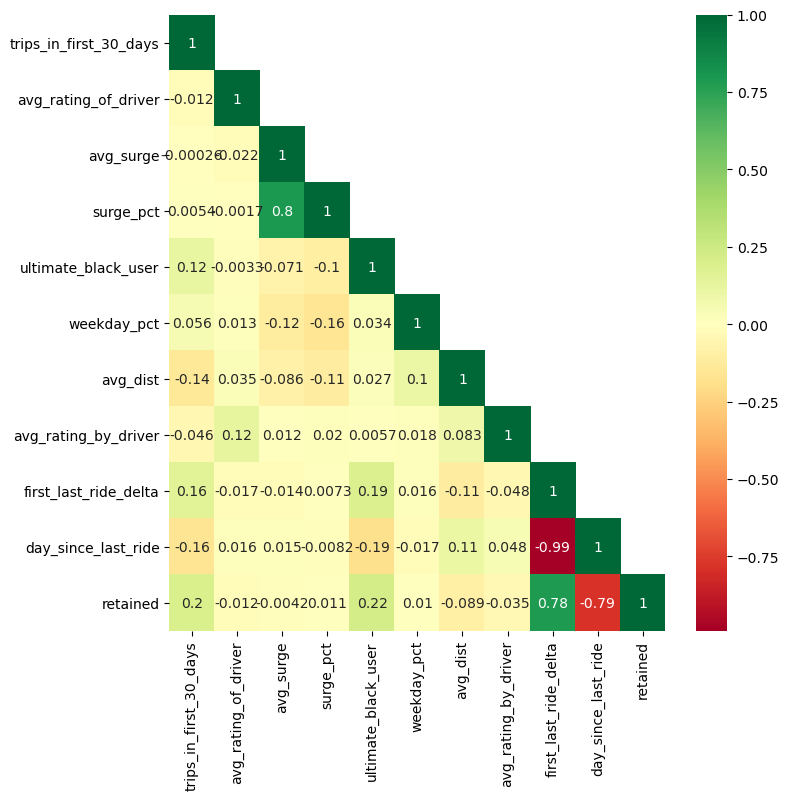

In [27]:
_,ax = plt.subplots(1,1,figsize=(8,8))

c = df.corr(method='pearson')
mask = np.triu(np.ones_like(c),k=1)

sns.heatmap(c, mask=mask, annot=True, cmap='RdYlGn', ax = ax)

plt.show()

In [28]:
"""
Dropping columns due to the colinearity.
"""
df.drop(columns=['first_last_ride_delta','day_since_last_ride'], inplace=True)

In [29]:
X = df[[col for col in df.columns if col != 'retained']]
y = df['retained']

cat_cols = X.select_dtypes(include=['object','bool']).columns.tolist()
num_cols = X.select_dtypes(include=['int64','float64']).columns.tolist()

X = X[num_cols+cat_cols]

scaler = StandardScaler()

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
X_tr_num_scaled = scaler.fit_transform(X_train[num_cols])

In [32]:
X_tr_scaled = pd.DataFrame(X_tr_num_scaled, columns=num_cols)
X_tr_scaled.set_index(X_train.index, inplace=True)

In [33]:
X_tr_OHE = pd.get_dummies(X_train[cat_cols])

In [34]:
X_tr_scaled = pd.concat([X_tr_scaled, X_tr_OHE],axis=1)

In [35]:
X_te_num_scaled = scaler.transform(X_test[num_cols])
X_te_scaled = pd.DataFrame(X_te_num_scaled, columns = num_cols)
X_te_scaled.set_index(X_test.index, inplace=True)

In [36]:
X_te_OHE = pd.get_dummies(X_test[cat_cols])

In [37]:
X_te_scaled = pd.concat([X_te_scaled, X_te_OHE], axis=1)

## Modeling

    Here we will be assessing three different classification models to assess the performance of each for this problem. First a cross validation of the model on the training set followed by testing the generalization on the testing set will be done.

In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report

### LogisticRegression:

In [39]:
cv_f1_LR = cross_val_score(LogisticRegression(), X_tr_scaled, y_train, cv = 5, scoring='f1', n_jobs=-1 )

In [40]:
cv_f1_LR

array([0.5901843 , 0.59696597, 0.59963062, 0.60253786, 0.60994924])

In [41]:
cv_f1_LR.mean()

0.5998535984757785

In [42]:
clf_lr = LogisticRegression()
clf_lr.fit(X_tr_scaled, y_train)
lr_preds = clf_lr.predict(X_te_scaled)

print(classification_report(y_test, lr_preds))

              precision    recall  f1-score   support

           0       0.71      0.82      0.76      4823
           1       0.68      0.55      0.61      3466

    accuracy                           0.70      8289
   macro avg       0.70      0.68      0.68      8289
weighted avg       0.70      0.70      0.70      8289



### RandomForestClassifier:

In [43]:
cv_f1_RF = cross_val_score(RandomForestClassifier(), X_tr_scaled, y_train, cv=5, scoring='f1', n_jobs=-1 )

In [44]:
cv_f1_RF

array([0.6904048 , 0.68974551, 0.6918939 , 0.68741845, 0.71045328])

In [45]:
cv_f1_RF.mean()

0.6939831881502727

In [46]:
clf_rf = RandomForestClassifier(n_estimators=500, max_depth=2)
clf_rf.fit(X_tr_scaled, y_train)
rf_preds = clf_rf.predict(X_te_scaled)

print(classification_report(y_test, rf_preds))

              precision    recall  f1-score   support

           0       0.70      0.89      0.78      4823
           1       0.75      0.46      0.57      3466

    accuracy                           0.71      8289
   macro avg       0.72      0.67      0.68      8289
weighted avg       0.72      0.71      0.69      8289



### GaussianNB:

In [47]:
cv_f1_GNB = cross_val_score(GaussianNB(), X_tr_scaled, y_train, cv=5, scoring='f1', n_jobs=-1 )

In [48]:
cv_f1_GNB.mean()

0.6639391902761164

In [49]:
clf_gnb = GaussianNB()
clf_gnb.fit(X_tr_scaled, y_train)
gnb_preds = clf_gnb.predict(X_te_scaled)

print(classification_report(y_test, gnb_preds))

              precision    recall  f1-score   support

           0       0.78      0.66      0.72      4823
           1       0.61      0.73      0.67      3466

    accuracy                           0.69      8289
   macro avg       0.69      0.70      0.69      8289
weighted avg       0.71      0.69      0.70      8289



### Model Selection Results:
    The preliminary results suggest that the best model is the RandomForest model as it outcompetes both the NB and LR models considerably.
    
    We will use the RF model to determine the feature importances of the features

In [50]:
rf_final = RandomForestClassifier()
rf_final.fit(X_tr_scaled, y_train)

RandomForestClassifier()

In [58]:
rf_final.score(X_te_scaled, y_test)

0.7515985040415007

    The final model has overall better evaluation metrics on precision and recall as well as f1 score for classes 0 and 1... Well maybe the recall for class 1 is a little low. But with an f1 score of .70 and an accuracy of .75 we can be fairly confident about the predictive power of this model.

In [52]:
feat_imps_rf = pd.Series(rf_final.feature_importances_, X_tr_scaled.columns)\
    .sort_values(ascending=False)

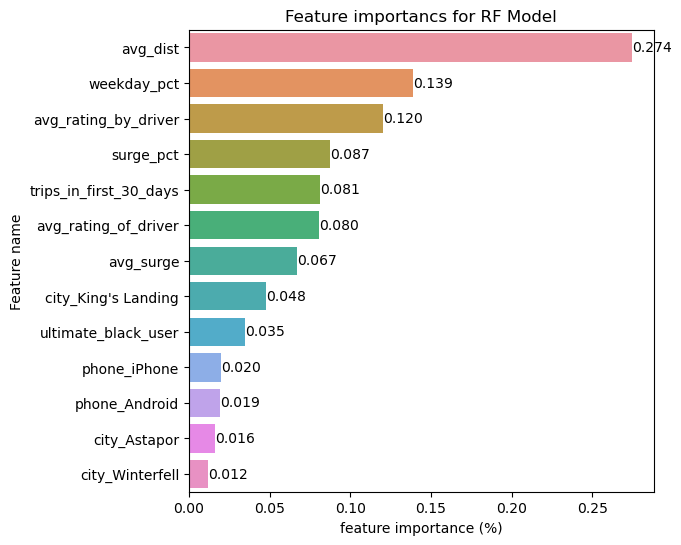

In [53]:
_, ax = plt.subplots(1,1,figsize=(6,6))

sns.barplot(data= feat_imps_rf.reset_index(), x=0, y='index', ax=ax)
for rect in ax.patches:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width(), rect.get_y() +height/2,
                f'{rect.get_width():.3f}',
                ha='left', va='center')
        
ax.set_title('Feature importancs for RF Model')
ax.set_xlabel('feature importance (%)')
ax.set_ylabel('Feature name')

plt.show()

From the above figure we see that the feature that has highest importance on the model's outcome is the avg_dist feature with ~ 27% of the model's decision coming from this feature along. Therefore it makes sense to look a bit deeper at how these feature differs amongst retained and non-retained users.

In [55]:
X_scaled_whole = pd.DataFrame(scaler.fit_transform(X[num_cols]), columns=num_cols, index=X.index)
X_scaled_whole = pd.concat([X_scaled_whole, pd.get_dummies(X[cat_cols])],axis=1)


In [56]:
rf_cv_final = cross_val_score(RandomForestClassifier(),X_scaled_whole,y, cv=5, n_jobs=-1, scoring='f1')
rf_cv_final.mean()

0.6928204012202202

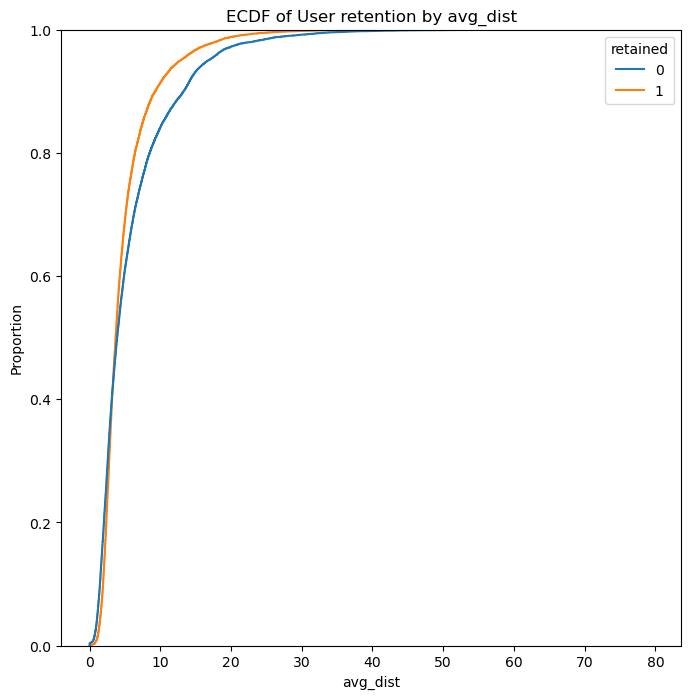

In [59]:
_, ax = plt.subplots(1,1,figsize=(8,8))

sns.ecdfplot(data = df, x='avg_dist',hue='retained',ax=ax)
ax.set_title('ECDF of User retention by avg_dist')
plt.show()

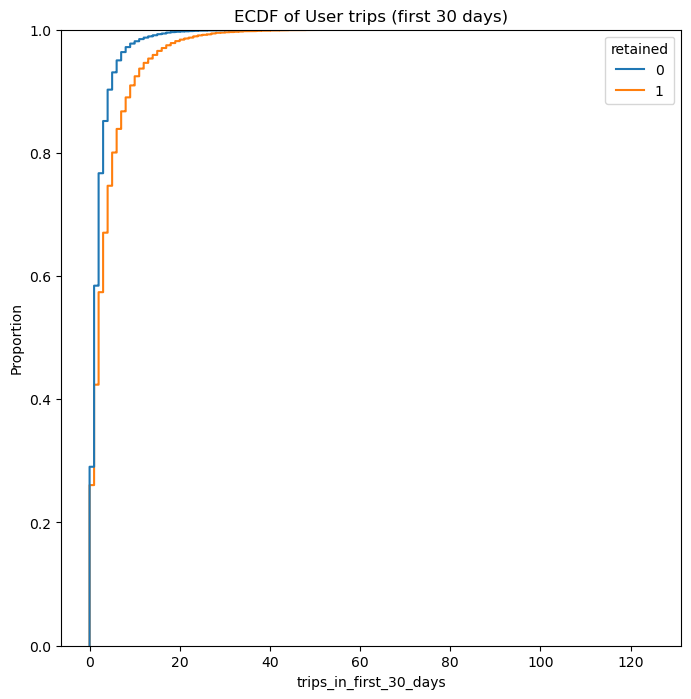

In [60]:
_, ax = plt.subplots(1,1,figsize=(8,8))

sns.ecdfplot(data = df, x='trips_in_first_30_days',hue='retained',ax=ax)
ax.set_title('ECDF of User trips (first 30 days)')
plt.show()

Looking a bit deeper at the ECDFs for both the retained and non-retained populations reveals that somewhere around 95% of all retained users had an average distance in the first 30 days less than 10 miles while non-retained users are somewhere around 20 miles traveled.

In [61]:
from scipy.stats import ttest_ind 

In [62]:
ttest_ind(df[df.retained==1].trips_in_first_30_days,df[df.retained==0].trips_in_first_30_days, equal_var=False)

Ttest_indResult(statistic=37.68967946501912, pvalue=2.659652740661384e-302)

In [63]:
ttest_ind(df[df.retained==1].avg_dist,df[df.retained==0].avg_dist, equal_var=False)

Ttest_indResult(statistic=-19.36398957784233, pvalue=3.628794389637156e-83)

The difference in population means for the number of trips taken and average distance traveled in the first 30 days reveals that there is significance in the differences.

In [81]:
bsamps = []

for _ in range(10000):
    samp = df.sample(frac=1, replace=True).groupby(['retained'])['avg_dist'].mean()
    bsamps.append(samp)
    
bs_df = pd.DataFrame(bsamps)

In [85]:
print(f"Un-retained users have a mean distance of {bs_df[0].mean():.2f} and a 95% CI of {[np.percentile(bs_df[0],0.025),np.percentile(bs_df[0],0.975)]}\n")
print(f"Retained users have a mean distance of {bs_df[1].mean():.2f} and a 95% CI of {[np.percentile(bs_df[1],0.025),np.percentile(bs_df[1],0.975)]}")

Un-retained users have a mean distance of 5.84 and a 95% CI of [5.720745681298555, 5.757857729522676]

Retained users have a mean distance of 4.91 and a 95% CI of [4.795031390482984, 4.8359102511577685]


In [86]:
bsamps = []

for _ in range(10000):
    samp = df.sample(frac=1, replace=True).groupby(['retained'])['trips_in_first_30_days'].mean()
    bsamps.append(samp)
    
bs_df = pd.DataFrame(bsamps)

In [87]:
print(f"Un-retained users took an average of {bs_df[0].mean():.2f} trips with a 95% CI of {[np.percentile(bs_df[0],0.025),np.percentile(bs_df[0],0.975)]}\n")
print(f"Retained users took an average of {bs_df[1].mean():.2f} trips with a 95% CI of {[np.percentile(bs_df[1],0.025),np.percentile(bs_df[1],0.975)]}")

Un-retained users took an average of 1.94 trips with a 95% CI of [1.8726952650387727, 1.8925593944254646]

Retained users took an average of 3.58 trips with a 95% CI of [3.4425069123175756, 3.4848438718184775]


In [88]:
bsamps = []

for _ in range(10000):
    samp = df.sample(frac=1, replace=True).groupby(['retained'])['weekday_pct'].mean()
    bsamps.append(samp)
    
bs_df = pd.DataFrame(bsamps)

In [89]:
print(f"Un-retained users had an average weekday trip percentage of {bs_df[0].mean():.2f} with a 95% CI of {[np.percentile(bs_df[0],0.025),np.percentile(bs_df[0],0.975)]}\n")
print(f"Retained users had an average weekday trip percentage of {bs_df[1].mean():.2f} and a 95% CI of {[np.percentile(bs_df[1],0.025),np.percentile(bs_df[1],0.975)]}")

Un-retained users had an average weekday trip percentage of 60.95 with a 95% CI of [60.11728160309104, 60.364402335775075]

Retained users had an average weekday trip percentage of 61.69 and a 95% CI of [60.97085992248326, 61.20989940617153]


What Ultimate can take away from this is that retained users take more shorter trips in the first 30 days since sign up. With retained and non-retained users traveling roughly the same amount on weekdays vs weekends Ultimate should think of ways for improving rider retension for those riders who take longer trips less frequently.